In [1]:
import sys

In [3]:
sys.path.append('/home/simon/git/pymzm')

In [6]:
from ms2_matching import MZMLFile,load_picked_boxes

In [8]:
mz_file_obj = MZMLFile('/home/simon/data/lipid_files/lipid_files/Condition_1/Pos/24_pp_s3_pos_1.mzML')

Loaded 1968 scans


In [13]:
boxes = load_picked_boxes('/home/simon/data/lipid_files/lipid_files/Condition_1/Pos/picked_peaks/24_pp_s3_pos_1_box.csv')

In [15]:
%load_ext autoreload
%autoreload 2
from chromatograms import add_chromatograms_to_boxes
add_chromatograms_to_boxes(boxes,mz_file_obj)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


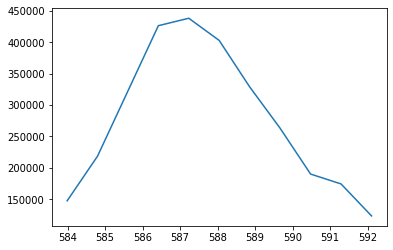

In [16]:
import pylab as plt
%matplotlib inline
boxes[203].peak_chromatogram.plot()

In [17]:
print(boxes[48].rt_range_in_seconds)
print(boxes[48].peak_chromatogram.rt_list[-1])

[497.7474, 503.5242]
503.5242


In [18]:
print(boxes[0].peak_chromatogram)
print(boxes[25].peak_chromatogram)

In [19]:
print(len(boxes[1].peak_chromatogram.rt_list))
print(len(boxes[2].peak_chromatogram.rt_list))
boxes[2].peak_chromatogram.add_point(1,2,3,4)
print(len(boxes[1].peak_chromatogram.rt_list))
print(len(boxes[2].peak_chromatogram.rt_list))



3
1
3
2


In [20]:
1 in [2,3,4]

False

In [21]:
[2,3,4].index(1)

ValueError: 1 is not in list

In [22]:
try:
    [2,3,4].index(1)
except:
    print("missing")

missing


In [23]:
boxes[3].peak_chromatogram.correlation(boxes[207].peak_chromatogram)

0.0

In [24]:
import numpy as np
correlations = {box:{} for box in boxes}
for i,box in enumerate(boxes[:-1]):
    for j,box2 in enumerate(boxes[i+1:]):
        c = box.peak_chromatogram.correlation(box2.peak_chromatogram)
        if c > 0:
            correlations[box][box2] = c
            correlations[box2][box] = c

In [26]:
from chromatograms import cluster_box_chromatograms
groups,correlations = cluster_box_chromatograms(boxes,threshold = 0.8,max_mz_diff = 10)

In [27]:
print(len(groups))

715


1


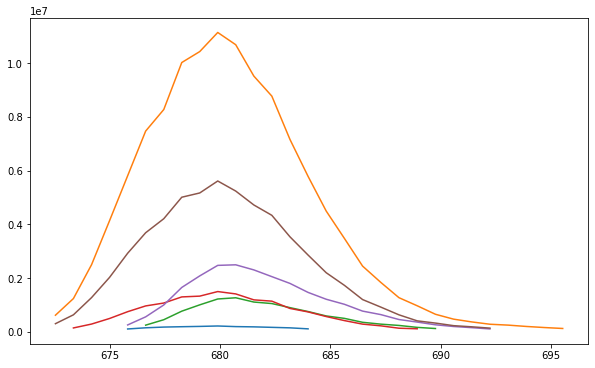

In [29]:
big = list(filter(lambda x: len(x) > 5,groups))
print(len(big))
group = big[0]
plt.figure(figsize=(10,6))
for box in group:
    plt.plot(box.peak_chromatogram.rt_list,box.peak_chromatogram.intensity_list)


In [30]:
print(dir(boxes[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'area', 'find_ms2_scans', 'height', 'ms2_scans', 'mz', 'mz_range', 'peak_chromatogram', 'peak_id', 'rt', 'rt_in_minutes', 'rt_in_seconds', 'rt_range', 'rt_range_in_seconds']


In [39]:
ff = list(filter(lambda x: x.mz > 760.57 and x.mz < 760.59,boxes))
ff = ff[1]


In [40]:
for g in groups:
    if ff in g:
        break

In [43]:
box = ff
group = list(g)
group.sort(key = lambda x: x.mz)
for b in group:
    print(b.mz,b.rt_in_seconds)

760.5836791992188 626.2320000000001
761.5867309570312 626.2320000000001
762.5897827148438 626.2320000000001
763.5924682617188 626.2320000000001


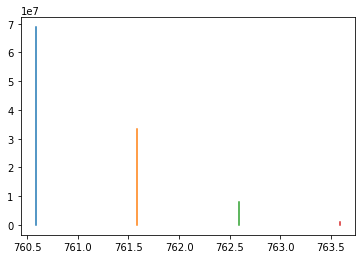

In [42]:
plt.figure(figsize=(6,4))
for b in group:
    plt.plot([b.mz,b.mz],[0,b.height])